In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df.isnull().mean()

Unnamed: 0           0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
New_Price            0.863100
Price                0.000000
dtype: float64

In [6]:
df.drop(['Unnamed: 0', 'New_Price'], axis = 1, inplace = True)

In [7]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [9]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
df.describe(include = 'O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,6019,6019,6019,6019,6019,6017,5983,5983
unique,1876,11,5,2,4,442,146,372
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp
freq,49,790,3205,4299,4929,172,606,235


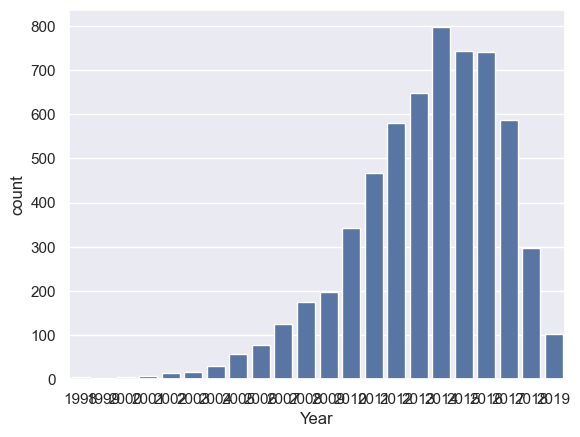

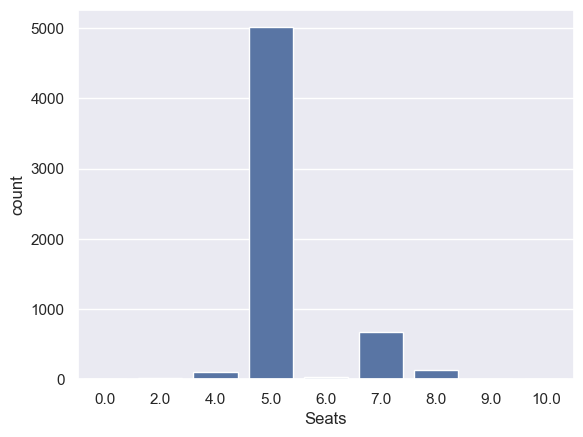

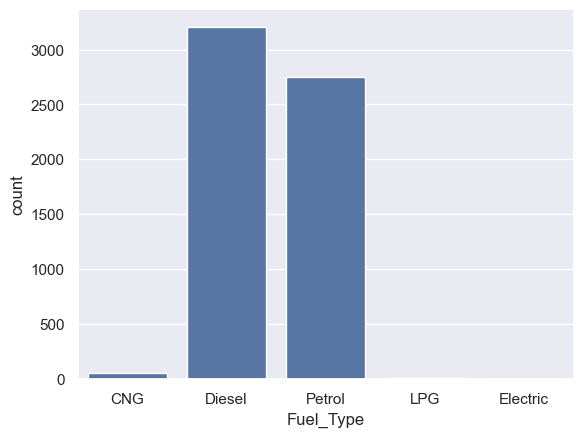

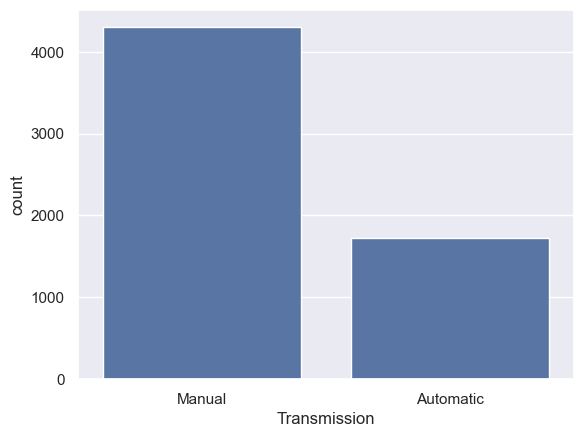

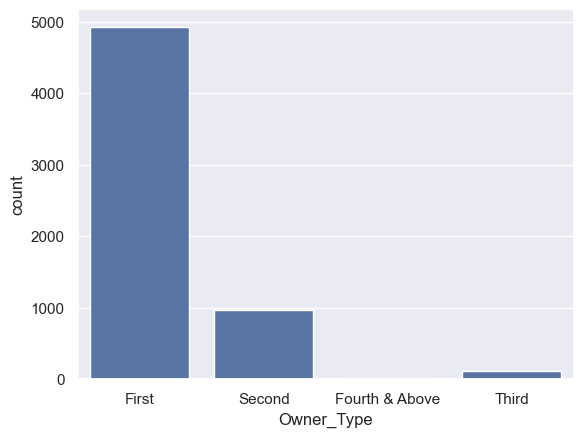

In [11]:
for col in ['Year', 'Seats','Fuel_Type','Transmission','Owner_Type']:
    df[col] = df[col].astype('object')
    sns.countplot(data = df, x = col)
    plt.show()

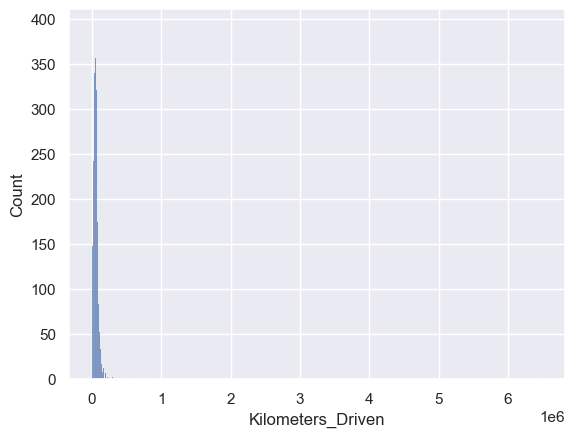

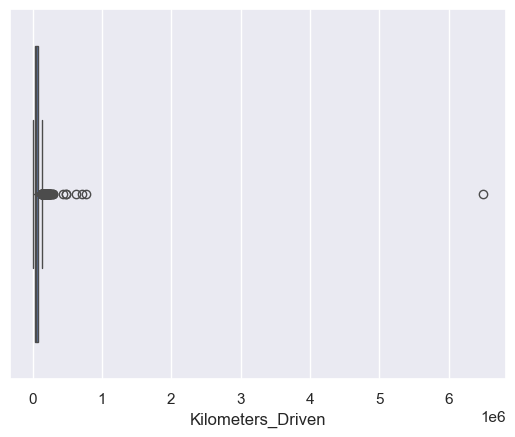

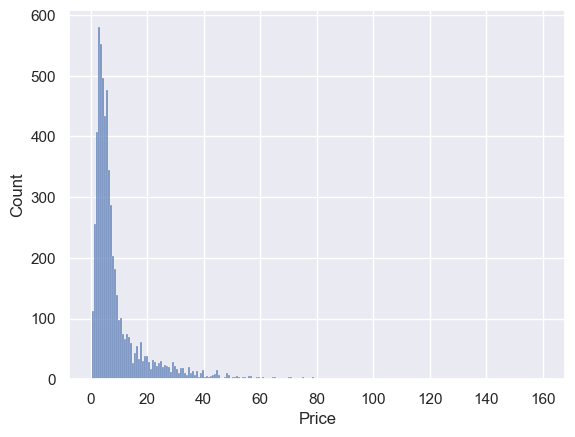

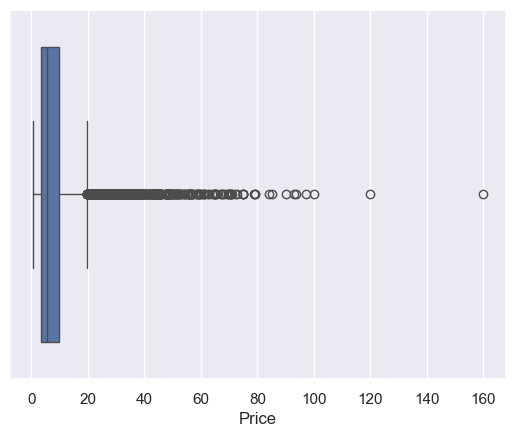

In [12]:
for col in ['Kilometers_Driven', 'Price']:
    sns.histplot(data = df, x = col)
    plt.show()
    
    sns.boxplot(data = df, x = col)
    plt.show()

<Axes: xlabel='price_usd'>

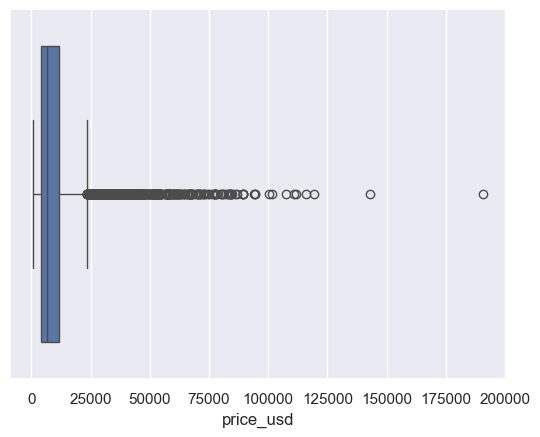

In [13]:
df['price_usd'] = df['Price'] * 1193.15
sns.boxplot(data = df, x = 'price_usd')

In [14]:
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])
df['Brand'].nunique()

31

In [15]:
df['Brand'].value_counts()

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

In [16]:
df[df['Brand'] == 'Maruti']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,price_usd,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,2088.0125,Maruti
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,7158.9000,Maruti
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,9.95,11871.8425,Maruti
12,Maruti Swift VDI BSIV,Jaipur,2015,64424,Diesel,Manual,First,25.2 kmpl,1248 CC,74 bhp,5.0,5.60,6681.6400,Maruti
17,Maruti Swift DDiS VDI,Jaipur,2017,25000,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,5.99,7146.9685,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003,Maruti Celerio VXI,Bangalore,2015,67600,Petrol,Manual,First,23.1 kmpl,998 CC,67.04 bhp,5.0,4.00,4772.6000,Maruti
6005,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,7.43,8865.1045,Maruti
6007,Maruti Swift Dzire Vdi BSIV,Delhi,2011,68000,Diesel,Manual,First,19.3 kmpl,1248 CC,73.9 bhp,5.0,2.75,3281.1625,Maruti
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,5667.4625,Maruti


In [17]:
df['Model'] = df['Name'].apply(lambda x: x.split()[1])
df['Model'].nunique()

212

In [18]:
df['Year'].value_counts()

Year
2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='Price'>

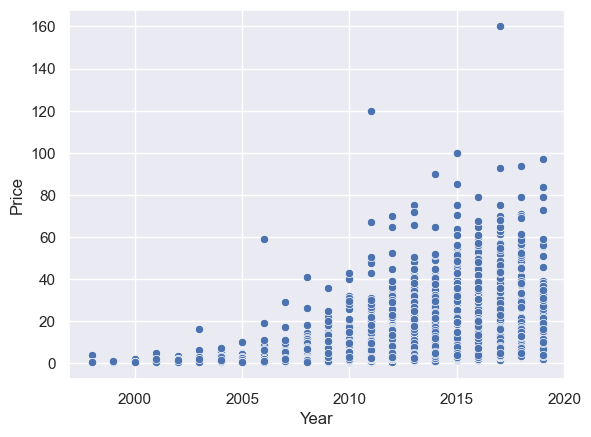

In [19]:
sns.scatterplot(data = df, x = 'Year', y = 'Price')

<Axes: xlabel='Year', ylabel='Price'>

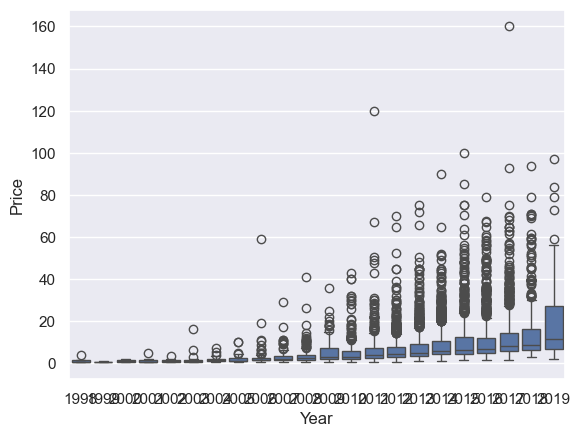

In [20]:
sns.boxplot(data = df, x = 'Year', y = 'Price')

In [21]:
df.Year.min(), df.Year.max()

(1998, 2019)

In [22]:
# Feature Engineering
df['Age']= 2020 - df['Year']

<Axes: xlabel='Age', ylabel='Count'>

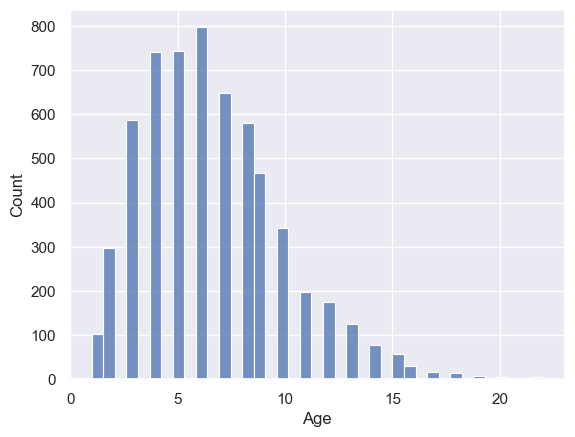

In [23]:
sns.histplot(data = df, x = 'Age')

In [24]:
# Mileage
df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [25]:
df.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
price_usd             0
Brand                 0
Model                 0
Age                   0
dtype: int64

In [26]:
def mileage_convert(x):
    if type(x) == str:
        if x.split()[-1] == 'km/kg':
            return float(x.split()[0])*1.40 #formula
        elif x.split()[-1] == 'kmpl':
            return float(x.split()[0])
    else:
        return np.nan
    
    
df['Mileage(kmpl)'] = df['Mileage'].apply(mileage_convert)

In [27]:
df['Mileage(kmpl)'].isna().sum()

2

In [28]:
# Engine
df['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [29]:
def engine_convert(x):
    if type(x) == str:
        return float(x.split()[0])
    else:
        return np.nan
    
    
df['Engine'] = df['Engine'].apply(engine_convert)

In [30]:
df['Engine'].isna().sum()

36

In [31]:
# Power
df['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [32]:
def power_convert(x):
    if type(x) == str:
        return x.split()[0]
    else:
        return np.nan
    
    
df['Power'] = df['Power'].apply(power_convert)

In [33]:
df['Power']

0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
6014       74
6015       71
6016      112
6017     67.1
6018     57.6
Name: Power, Length: 6019, dtype: object

In [34]:
df['Power'] = pd.to_numeric(df['Power'], errors = 'coerce')
df['Power'].isna().sum()

143

<Axes: xlabel='Kilometers_Driven'>

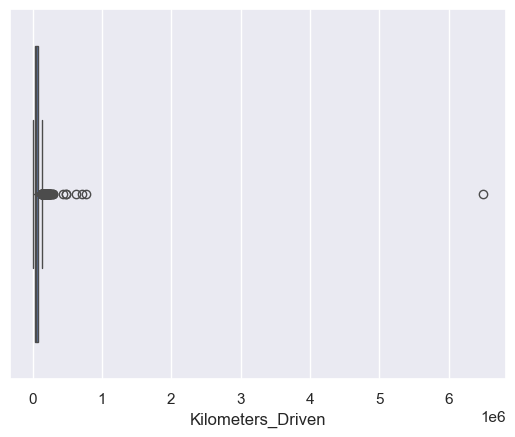

In [35]:
sns.boxplot(data = df, x = 'Kilometers_Driven')

In [36]:
df['Seats'].value_counts()

Seats
5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

In [37]:
df.drop(df[df['Seats'] == 0].index, axis = 0, inplace = True)

In [38]:
df.drop(df[df['Kilometers_Driven'] == df['Kilometers_Driven'].max()].index, axis = 0, inplace = True)

<Axes: xlabel='Kilometers_Driven'>

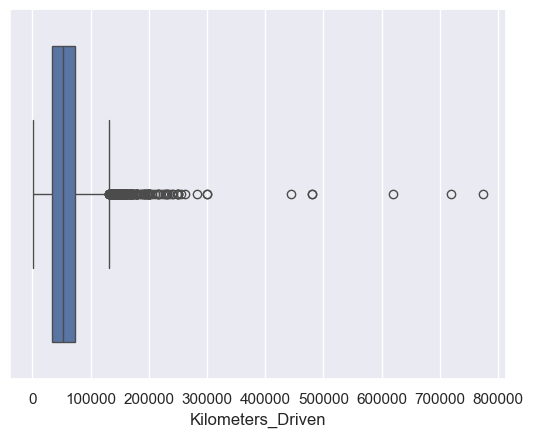

In [39]:
sns.boxplot(data = df, x = 'Kilometers_Driven')

In [40]:
df['Seats'].value_counts()

Seats
5.0     5013
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
Name: count, dtype: int64

# Missing Values

In [41]:
df.drop(['Mileage', 'Year', 'price_usd'], axis = 1, inplace = True)
df

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Brand,Model,Age,Mileage(kmpl)
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,998.0,58.16,5.0,1.75,Maruti,Wagon,10,37.24
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,1582.0,126.20,5.0,12.50,Hyundai,Creta,5,19.67
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,1199.0,88.70,5.0,4.50,Honda,Jazz,9,18.20
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,1248.0,88.76,7.0,6.00,Maruti,Ertiga,8,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,1968.0,140.80,5.0,17.74,Audi,A4,7,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,27365,Diesel,Manual,First,1248.0,74.00,5.0,4.75,Maruti,Swift,6,28.40
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,100000,Diesel,Manual,First,1120.0,71.00,5.0,4.00,Hyundai,Xcent,5,24.40
6016,Mahindra Xylo D4 BSIV,Jaipur,55000,Diesel,Manual,Second,2498.0,112.00,8.0,2.90,Mahindra,Xylo,8,14.00
6017,Maruti Wagon R VXI,Kolkata,46000,Petrol,Manual,First,998.0,67.10,5.0,2.65,Maruti,Wagon,7,18.90


In [42]:
df.isna().mean()

Name                 0.000000
Location             0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Engine               0.005983
Power                0.023600
Seats                0.006980
Price                0.000000
Brand                0.000000
Model                0.000000
Age                  0.000000
Mileage(kmpl)        0.000332
dtype: float64

# Outliers

In [43]:
df.dtypes

Name                  object
Location              object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Engine               float64
Power                float64
Seats                 object
Price                float64
Brand                 object
Model                 object
Age                   object
Mileage(kmpl)        float64
dtype: object

In [44]:
df['Age'] = df['Age'].astype('int')

In [45]:
num_cols = df.select_dtypes(exclude = 'object').columns

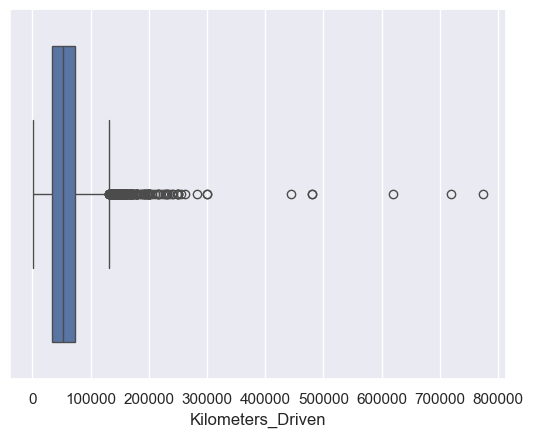

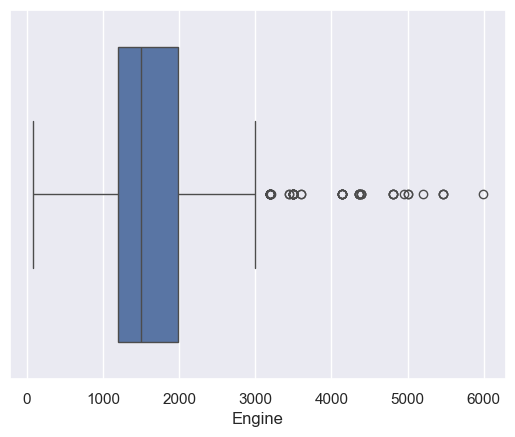

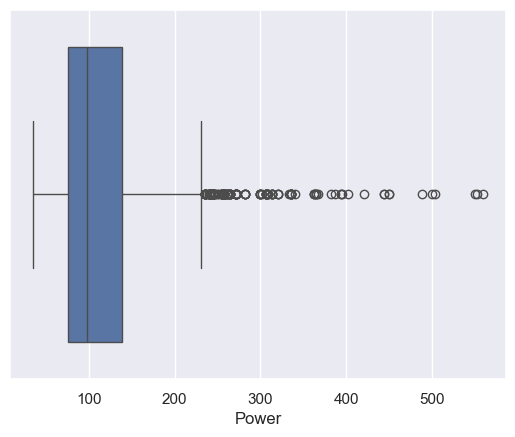

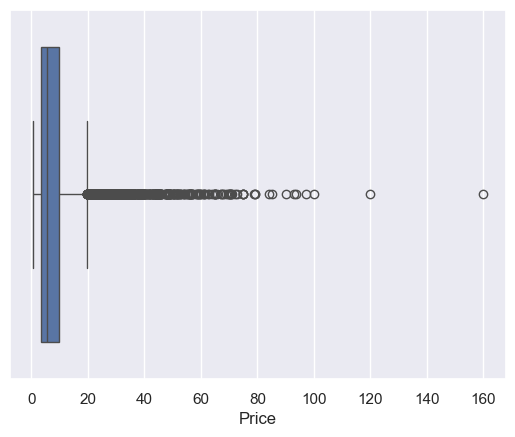

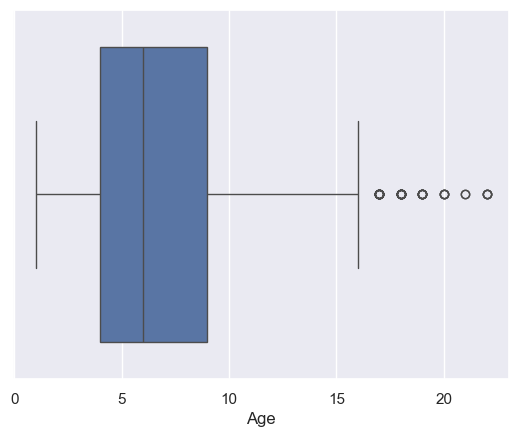

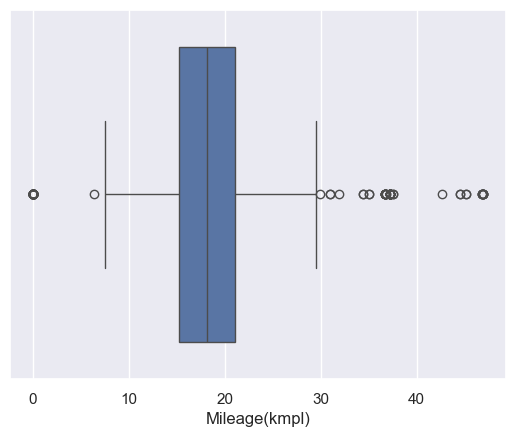

In [46]:
for col in num_cols:
    sns.boxplot(data = df, x = col)
    plt.show()

In [47]:
df['Kilometers_Driven'].quantile([0.7, 0.8, 0.9, 0.95, 0.99, 0.995, 0.999, 1])

0.700     68367.000
0.800     79000.000
0.900     96827.000
0.950    120000.000
0.990    171882.000
0.995    200000.000
0.999    299989.152
1.000    775000.000
Name: Kilometers_Driven, dtype: float64

In [48]:
df['Kilometers_Driven'].quantile(0.999)

299989.15200000023

<Axes: xlabel='Kilometers_Driven'>

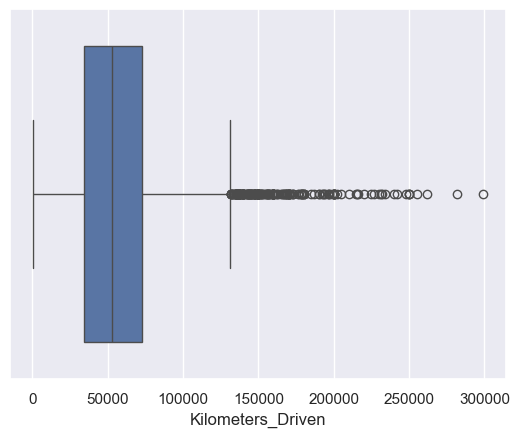

In [49]:
df2 = df[df['Kilometers_Driven'] < df['Kilometers_Driven'].quantile(0.999)]
sns.boxplot(data = df2, x = 'Kilometers_Driven')

<Axes: xlabel='Price'>

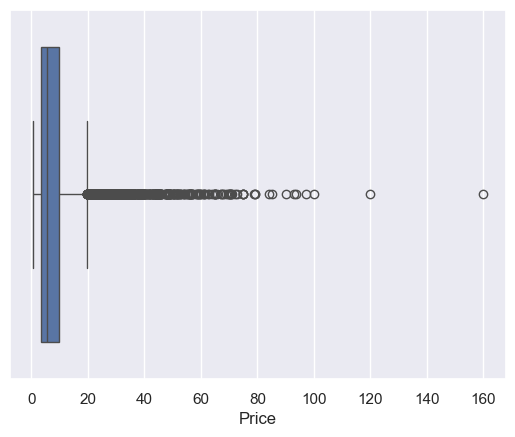

In [50]:
sns.boxplot(data = df, x = 'Price')

In [51]:
def outliers_handling(x, p1=0.25, p2=0.75):
    q1 = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    return x[(x > min_limit) & (x < max_limit)]

In [52]:
df3 = df2.copy()
for col in [ 'Engine', 'Power', 'Mileage(kmpl)']:
    df3[col] = outliers_handling(df3[col])

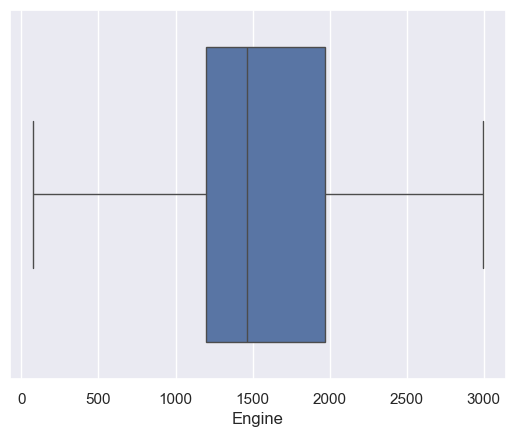

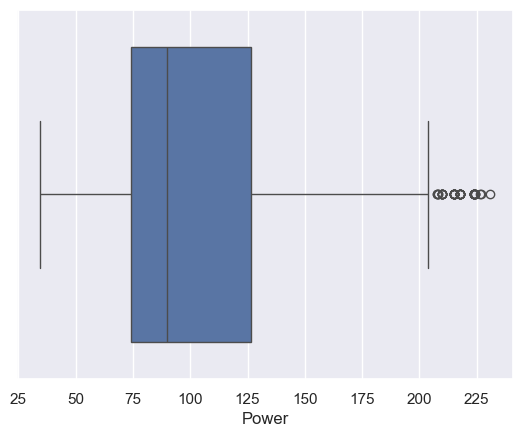

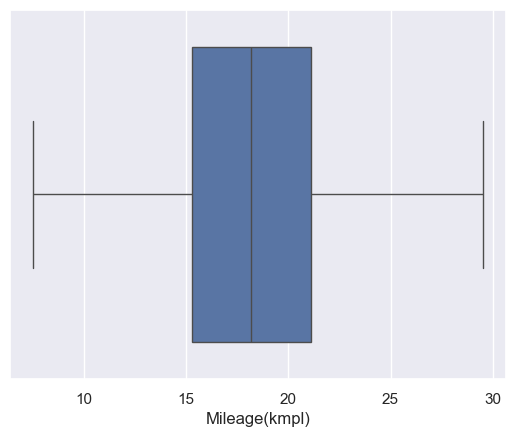

In [53]:
for col in [ 'Engine', 'Power', 'Mileage(kmpl)']:
    sns.boxplot(data = df3, x = col)
    plt.show()

In [54]:
df3.describe()

,Kilometers_Driven,Engine,Power,Price,Age,Mileage(kmpl)
count,6010.000000,5914.000000,5631.000000,6010.000000,6010.000000,5892.000000
mean,57088.404493,1597.229117,106.224324,9.473273,6.640932,18.290740
std,33619.276252,551.181201,40.717823,11.171385,3.270445,4.099188
min,171.000000,72.000000,34.200000,0.440000,1.000000,7.500000
25%,34000.000000,1197.000000,74.000000,3.500000,4.000000,15.300000
50%,53000.000000,1462.000000,90.000000,5.640000,6.000000,18.200000
75%,72999.000000,1968.000000,126.320000,9.950000,9.000000,21.100000
max,299322.000000,2999.000000,231.100000,160.000000,22.000000,29.540000


In [55]:
df3.describe(include = 'O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Model
count,6010,6010,6010,6010,6010,5968.0,6010,6010
unique,1874,11,5,2,4,8.0,31,212
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,5.0,Maruti,Swift
freq,49,790,3200,4294,4920,5006.0,1211,353


In [56]:
df3.drop('Name', axis = 1, inplace = True)

In [57]:
df3.to_csv('cleaned_data.csv', index = False)

# Data Splitting

In [58]:
X = df3.drop('Price', axis = 1)
y = df3['Price']

In [59]:
num_cols = X.select_dtypes(exclude = 'object').columns.tolist()
print(num_cols)

['Kilometers_Driven', 'Engine', 'Power', 'Age', 'Mileage(kmpl)']


In [60]:
nominal_cols = ['Location', 'Fuel_Type', 'Transmission', 'Brand']
ordinal_cols = ['Seats', 'Owner_Type']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((4808, 12), (1202, 12))

In [62]:
df3.isna().mean()

Location             0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Engine               0.015973
Power                0.063062
Seats                0.006988
Price                0.000000
Brand                0.000000
Model                0.000000
Age                  0.000000
Mileage(kmpl)        0.019634
dtype: float64

In [63]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

ordinal_pipeline = Pipeline([
    ('ord_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ord_encoder', OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ('nom_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),
    ('ordinal_pipeline', ordinal_pipeline, ordinal_cols),
    ('nominal_pipeline', nominal_pipeline, nominal_cols)
]).set_output(transform = 'pandas')

In [64]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [65]:
X_train_prep

,num_pipeline__Kilometers_Driven,num_pipeline__Engine,num_pipeline__Power,num_pipeline__Age,num_pipeline__Mileage(kmpl),ordinal_pipeline__Seats,ordinal_pipeline__Owner_Type,nominal_pipeline__Location_Bangalore,nominal_pipeline__Location_Chennai,nominal_pipeline__Location_Coimbatore,...,nominal_pipeline__Brand_Mitsubishi,nominal_pipeline__Brand_Nissan,nominal_pipeline__Brand_Porsche,nominal_pipeline__Brand_Renault,nominal_pipeline__Brand_Skoda,nominal_pipeline__Brand_Smart,nominal_pipeline__Brand_Tata,nominal_pipeline__Brand_Toyota,nominal_pipeline__Brand_Volkswagen,nominal_pipeline__Brand_Volvo
5644,-0.117769,-0.167915,-0.426217,-0.193670,0.453403,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4442,0.690664,-0.354527,-0.909933,-0.806884,1.655049,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2354,0.062336,-0.718603,-0.657892,0.419544,0.507799,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5344,-0.116310,-0.718603,-0.583297,-0.500277,0.072635,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3309,-0.498672,-0.014234,0.546308,-1.113491,0.337195,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,-0.139921,-0.718603,-0.657892,-0.500277,-0.147420,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5200,-0.557834,-1.080849,-0.960851,-1.420098,1.036919,2.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5235,-0.473602,-0.714944,-0.568786,-0.500277,-0.026266,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5399,0.330305,0.560237,0.032041,0.726151,-0.669122,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Model Training

In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_prep, y_train)

LinearRegression()

In [67]:
model.intercept_

18.843035218800352

In [68]:
model.coef_

array([-1.11213234e+00,  3.58490995e+00, -1.53111160e+00, -3.21919898e+00,
       -1.58139282e+00, -3.84751103e-02, -1.23439693e-01,  2.23836439e+00,
        1.23596064e+00,  1.76060074e+00, -4.82368815e-01,  1.59294255e+00,
        7.49385166e-01, -1.49747864e-01, -1.20370368e+00, -7.26000461e-01,
        4.25938265e-01,  2.95095604e+00,  1.07530657e+01,  2.28415865e+00,
        1.05766413e+00, -1.44587763e+00,  8.00720657e-01,  4.09975260e+01,
       -1.34836148e+01, -1.60443360e+01, -1.32977890e+01, -1.51494534e+01,
       -1.30224240e+01, -1.27862710e+01, -1.28451463e+01, -2.18236751e+01,
        9.54841135e+00, -7.01538133e+00,  1.01848975e+02,  1.37618295e+01,
       -1.68275331e+01, -1.24108566e+01,  1.08663422e+00,  3.92104313e+00,
       -1.40197293e+01, -1.42077640e+01,  1.50472354e+01, -1.40617213e+01,
       -1.23364655e+01, -7.57771683e+00, -1.52901078e+01, -1.31026948e+01,
       -1.43453215e+01, -4.56800158e+00])

In [69]:
# Error & AccuracyEvaluation
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test_prep)
print('r2_score', r2_score(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score 0.7466318619732298
mean_squared_error 28.95375845280997
root_mean_squared_error 5.380869674393719


In [70]:
# Ridge
from sklearn.linear_model import Ridge
model = Ridge(alpha = 10000)
model.fit(X_train_prep, y_train)
y_pred = model.predict(X_test_prep)
print('r2_score', r2_score(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score 0.40563819200254736
mean_squared_error 67.92096416051889
root_mean_squared_error 8.241417606244626


In [71]:
# Apply PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy = 'median')),
    ('poly', PolynomialFeatures(degree = 5)),
    ('scaler', StandardScaler())
])

ordinal_pipeline = Pipeline([
    ('ord_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ord_encoder', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)),
])

nominal_pipeline = Pipeline([
    ('nom_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),
    ('ordinal_pipeline', ordinal_pipeline, ordinal_cols),
    ('nominal_pipeline', nominal_pipeline, nominal_cols)
]).set_output(transform = 'pandas')

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [72]:
model = LinearRegression()
model.fit(X_train_prep, y_train)
y_pred = model.predict(X_test_prep)
print('r2_score', r2_score(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score 0.856439143532173
mean_squared_error 16.40548173823186
root_mean_squared_error 4.050368099103076


In [73]:
model = Ridge(alpha = 10)
model.fit(X_train_prep, y_train)
y_pred = model.predict(X_test_prep)
print('r2_score', r2_score(y_test, y_pred))
print('train r2_score', model.score(X_train_prep, y_train))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score 0.8601909899392643
train r2_score 0.8392941576065931
mean_squared_error 15.976737794857687
root_mean_squared_error 3.99709116669331


<Axes: >

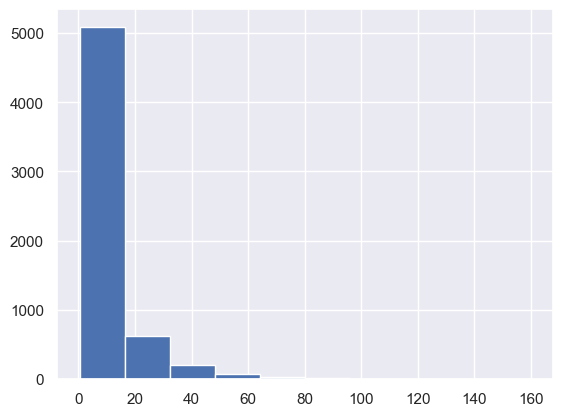

In [74]:
df3.Price.hist()

<Axes: >

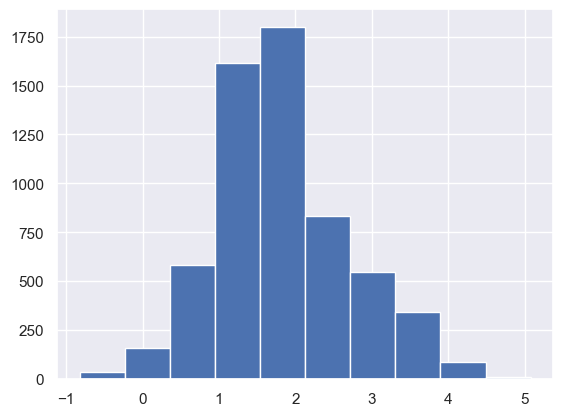

In [75]:
np.log(df3.Price).hist()

In [76]:
y_train = np.log(y_train)
y_test = np.log(y_test)

model = LinearRegression()
model.fit(X_train_prep, y_train)
y_pred = model.predict(X_test_prep)
print('r2_score', r2_score(y_test, y_pred))
print('train r2_score', model.score(X_train_prep, y_train))
print('root_mean_squared_error', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score 0.9204044111929816
train r2_score 0.9463753356158635
root_mean_squared_error 0.2480631788361753


# Cross Validation

In [77]:
# One Split for Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)
X_valid_prep = preprocessor.transform(X_valid)

y_train = np.log(y_train)
y_test = np.log(y_test)
y_valid = np.log(y_valid)

In [78]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
m1 = LinearRegression()
m2 = Ridge()
m3 = Lasso()

val_scores = {}
for model in [m1, m2, m3]:
    model.fit(X_train_prep, y_train)
    val_score = model.score(X_valid_prep, y_valid)
    val_scores[model] = val_score
    

In [79]:
val_scores

{LinearRegression(): 0.9177463410736054,
 Ridge(): 0.9194771444326846,
 Lasso(): -0.0002166796561211548}

In [80]:
# Cross Validation
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

y_train = np.log(y_train)
y_test = np.log(y_test)

val_scores = {}
for model in [m1, m2, m3]:
    scores = cross_val_score(model, X_train_prep, y_train, cv = 5, scoring = 'r2')
    val_scores[model] = scores

In [81]:
val_scores

{LinearRegression(): array([0.8849767 , 0.79881329, 0.91381862, 0.72295112, 0.92615966]),
 Ridge(): array([0.92494198, 0.90490015, 0.9189228 , 0.92465845, 0.93839463]),
 Lasso(): array([-2.95905620e-05, -1.06460653e-03, -5.91821974e-04, -1.82388558e-05,
        -6.74395953e-05])}

In [82]:
val_scores = {}
for model in [m1, m2, m3]:
    scores = cross_val_score(model, X_train_prep, y_train, cv = 5, scoring = 'r2')
    val_scores[model] = scores.mean()

In [83]:
val_scores

{LinearRegression(): 0.8493438795072811,
 Ridge(): 0.922363599860792,
 Lasso(): -0.0003543395026251339}

In [84]:
# Hyperparameter Tuning for polynomial degree and alpha
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = Pipeline([('preprocessor', preprocessor),
                  ('ridge', Ridge())
])

params = {
    'preprocessor__num_pipeline__poly__degree': [2, 3, 4, 5],
    'ridge__alpha': [0.1, 1, 10]
}
grid = GridSearchCV(model, params, cv = 3, scoring = 'r2')
grid.fit(X_train, y_train)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num_pipeline__poly__degree,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035926,0.001435,0.015352,0.001295,2,0.1,{'preprocessor__num_pipeline__poly__degree': 2...,0.922624,0.910388,0.921507,0.918173,0.005524,6
1,0.035899,0.001778,0.017680,0.002200,2,1,{'preprocessor__num_pipeline__poly__degree': 2...,0.922178,0.908585,0.920275,0.917013,0.006010,7
2,0.033317,0.003751,0.015328,0.001350,2,10,{'preprocessor__num_pipeline__poly__degree': 2...,0.911534,0.897860,0.907986,0.905794,0.005794,12
3,0.040006,0.005450,0.016056,0.002103,3,0.1,{'preprocessor__num_pipeline__poly__degree': 3...,0.928173,0.914750,0.927618,0.923514,0.006201,1
4,0.038408,0.000762,0.016376,0.001553,3,1,{'preprocessor__num_pipeline__poly__degree': 3...,0.926104,0.910778,0.924445,0.920442,0.006867,4
5,0.041352,0.004220,0.016790,0.002234,3,10,{'preprocessor__num_pipeline__poly__degree': 3...,0.915062,0.901157,0.911429,0.909216,0.005888,11
6,0.053440,0.007750,0.019623,0.001229,4,0.1,{'preprocessor__num_pipeline__poly__degree': 4...,0.923484,0.912980,0.927551,0.921338,0.006139,3
7,0.048593,0.001759,0.019465,0.000453,4,1,{'preprocessor__num_pipeline__poly__degree': 4...,0.924855,0.912745,0.926492,0.921364,0.006131,2
8,0.053766,0.001966,0.021770,0.001610,4,10,{'preprocessor__num_pipeline__poly__degree': 4...,0.915804,0.902808,0.914112,0.910908,0.005769,10
9,0.074120,0.015321,0.031402,0.001872,5,0.1,{'preprocessor__num_pipeline__poly__degree': 5...,0.912967,0.911311,0.926683,0.916987,0.006889,8


In [85]:
grid.best_params_

{'preprocessor__num_pipeline__poly__degree': 3, 'ridge__alpha': 0.1}

In [86]:
grid.best_score_

0.9235137002116122

# Best Model

In [87]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print('r2_score', r2_score(y_test, y_pred))

r2_score 0.9348569513226921


# Save Model 


In [88]:
import pickle
pickle.dump(best_model, open('model.pkl', 'wb'))

# Inference

In [89]:
prep_model = pickle.load(open('model.pkl', 'rb'))

In [90]:
X_new = X_test.iloc[:1]
X_new

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Brand,Model,Age,Mileage(kmpl)
79,Hyderabad,87591,Petrol,Manual,First,1086.0,NaN,5.0,Hyundai,Santro,15,NaN


In [91]:
y_pred = prep_model.predict(X_new)
y_pred

array([0.40298444])

In [92]:
%%writefile cars_app.py

import streamlit as st
import pickle
import pandas as pd
import numpy as np

st.title('Car Price Prediction App')

reg = pickle.load(open('model.pkl', 'rb'))

df = pd.read_csv('cleaned_data.csv')


brand = st.selectbox( 'Brand', df['Brand'].unique())
model = st.selectbox( 'Model', df['Model'].unique())
kilometers_driven = st.number_input( 'Kilometers Driven', min_value = df['Kilometers_Driven'].min(), max_value = df['Kilometers_Driven'].max())
fuel_type = st.selectbox( 'Fuel Type', df['Fuel_Type'].unique())
transmission = st.selectbox('Transmission',  df['Transmission'].unique())
owner_type = st.selectbox( 'Owner Type', df['Owner_Type'].unique())
engine = st.number_input( 'Engine', min_value = df['Engine'].min(), max_value = df['Engine'].max())
power = st.number_input('Power', min_value = df['Power'].min(), max_value = df['Power'].max())
seats = st.number_input( 'Seats', min_value = df['Seats'].min(), max_value = df['Seats'].max())
location = st.selectbox( 'Location', df['Location'].unique())
mileage = st.number_input( 'Mileage', min_value = df['Mileage(kmpl)'].min(), max_value = df['Mileage(kmpl)'].max())
year = st.number_input( 'Year', min_value = 1998, max_value = 2019)
age = 2022 - year
new_data = pd.DataFrame( {
    'Location': location,
    'Kilometers_Driven': kilometers_driven,
    'Fuel_Type': fuel_type,
    'Transmission': transmission,
    'Owner_Type': owner_type,
    'Engine': engine,
    'Power': power,
    'Seats': seats,
    'Brand': brand,
    'Model': model,
    'Age': age,
    'Mileage(kmpl)': mileage
}, index = [0])

pred = reg.predict( new_data )
price = np.exp( pred )
st.write( 'The predicted price of the car is', price[0].round(2) )

Overwriting cars_app.py


# Create Requirements file

In [93]:
# !pip install pipreqs

In [94]:
!pipreqs .

INFO: Not scanning for jupyter notebooks.
